[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<function matplotlib.pyplot.show(close=None, block=None)>

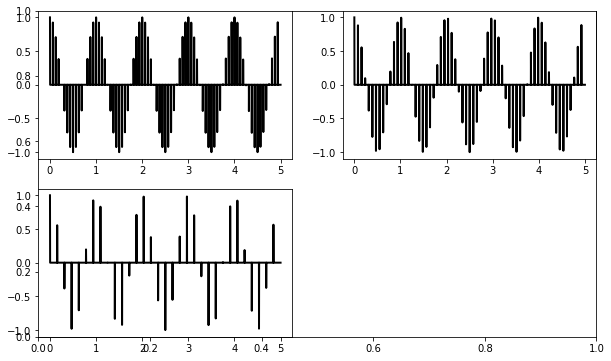

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
# 1. Задать гармонический сигнал cos(2 * pi * t), количество отсчётов 3200, интервал [0, 5].
SAMPLES = 3200  # количество отсчётов
t = np.linspace(0, 5, SAMPLES, endpoint=True)  # массив отсчётов времени в интервале [0, 5]
signal = np.cos(2 * np.pi * t)  # тестовый сигнал
# 2. Сгенерировать последовательность дельта-функций. Период последовательности n = 40, 50, 100, т.е. каждый n-й отсчёт должен быть единичным импульсом.
a1 = np.zeros(3200, dtype=int)
a1[0:3200:40] = 1
print(a1[::40])
a2 = np.zeros(3200, dtype=int)
a2[0:3200:50] = 1
print(a2[::50])
a3 = np.zeros(3200, dtype=int)
a3[0:3200:100] = 1
print(a3[::100])
# 3. Выполнить дискретизацию гармонического сигнала путем умножения его на функцию дискретизации.
z = signal * a1
x = signal * a2
c = signal * a3
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_1.plot(t, z, 'k', linewidth=2.0)
ax_2.plot(t, x, 'k', linewidth=2.0)
ax_3.plot(t, c, 'k', linewidth=2.0)
plt.show 

In [2]:
# 2. Сгенерировать последовательность дельта-функций. Период последовательности n = 40, 50, 100, т.е. каждый n-й отсчёт должен быть единичным импульсом.
a = np.zeros(SAMPLES)
a[0] = 40
a[1] = 50
a[2] = 100
print(a[:3]) 

[ 40.  50. 100.]


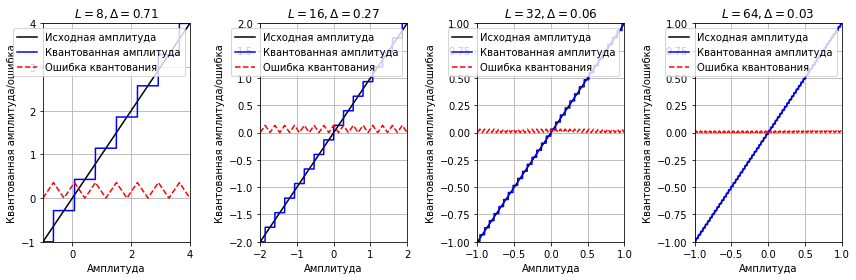

In [3]:
# 1. Реализовать функцию равномерного квантования.
def quantize_uniform(signal_ampl, quant_min=-1.0, quant_max=1.0, quant_level=4):
    x_normalize = (signal_ampl - quant_min) * (quant_level - 1) / (quant_max - quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.round(x_normalize) 
    x_quant = x_normalize_quant * (quant_max - quant_min) / (quant_level - 1) + quant_min
    return x_quant
# 2. Получить квантованные значения для линейной функции y = x.
def plot_graph_quant_function(axis, quant_min=-1.0, quant_max=1.0, quant_level=256):
    x_cont = np.linspace(quant_min, quant_max, 1000)
    x_quant = quantize_uniform(x_cont, quant_min=quant_min,
                               quant_max=quant_max, quant_level=quant_level)
    quant_stepsize = (quant_max - quant_min) / (quant_level - 1)
    title = f'$L = {quant_level:d}, \\Delta = {quant_stepsize:.2f}$'
    # title = r'$L = %d, \Delta=%0.2f$' % (quant_level, quant_stepsize)
    error = np.abs(x_quant - x_cont)
    axis.plot(x_cont, x_cont, color='k', label='Исходная амплитуда')
    axis.plot(x_cont, x_quant, color='b', label='Квантованная амплитуда')
    axis.plot(x_cont, error, 'r--', label='Ошибка квантования')
    axis.set_title(title)
    axis.set_xlabel('Амплитуда')
    axis.set_ylabel('Квантованная амплитуда/ошибка')
    axis.set_xlim([quant_min, quant_max])
    axis.set_ylim([quant_min, quant_max])
    axis.grid('on')
    axis.legend()
# 3. Применить равномерное квантование к синусоиде с варьируемым числом
# уровней квантования L = 8, 16, 32, 64. Вывести полученный результат.
plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 4, 1)
plot_graph_quant_function(ax, quant_min=-1, quant_max=4, quant_level=8)
ax = plt.subplot(1, 4, 2)
plot_graph_quant_function(ax, quant_min=-2, quant_max=2, quant_level=16)
ax = plt.subplot(1, 4, 3)
plot_graph_quant_function(ax, quant_min=-1, quant_max=1, quant_level=32)
ax = plt.subplot(1, 4, 4)
plot_graph_quant_function(ax, quant_min=-1, quant_max=1, quant_level=64)
plt.tight_layout()
plt.show()